# Milestone2


Please put this notebook in the same folder as the training data and unzip the train.json

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD

In [2]:
t = pd.read_json('train.json')

In [3]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
testing = pd.read_json('test.json')

In [5]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Remove outliers

In [6]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [7]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [8]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [9]:
def outputCSV(predLabel):#用来得到csv传到网上去检测loss
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission_rf.csv", index=False)

### Features selection

#### 0.Naive features

In [10]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']

In [11]:
X_pred = testing[featureSelect]

In [12]:
X = t[featureSelect]

In [13]:
y = t['interest_level']

In [14]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [186]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [143]:
scores.mean()

-0.7011212401590113

In [47]:
treeModel.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
treeModel.score(X,y)

0.7065614653652663

In [49]:
predLable = treeModel.predict_proba(X_pred)

In [50]:
outputCSV(predLable)

你们的代码从这行开始写，下面是我给的logistic regression的例子 (SVM 需要3-5分钟， 需要找一个比较快的SVM方法）

In [144]:
logReg = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',solver='sag')
)

In [145]:
scores = cross_val_score(logReg,X, y, cv=10,scoring = 'neg_log_loss')

In [146]:
scores.mean()

-0.7106692143879907

In [147]:
logReg.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0, solver='sag',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [148]:
predLable = logReg.predict_proba(X_pred)

In [149]:
outputCSV(predLable)

result: 0.73383

In [150]:
svm = make_pipeline(
    StandardScaler(),
    PCA(2),
    SVC(kernel = 'sigmoid', C = 1, max_iter = 10, probability = True)
)
scores = cross_val_score(svm,X, y, cv=10,scoring = 'neg_log_loss')
scores.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

-0.7716695282297524

In [151]:
svm.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='sigmoid', max_iter=10,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [152]:
svm.score(X, y)

0.24762437115707098

In [153]:
predLable = svm.predict_proba(X_pred)
outputCSV(predLable)

result: 0.79014

logloss: 0.71082 (depth = 5) logreg--0.73553 svm--0.79120 越低越好



#### 1.Tune parameters

In [187]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

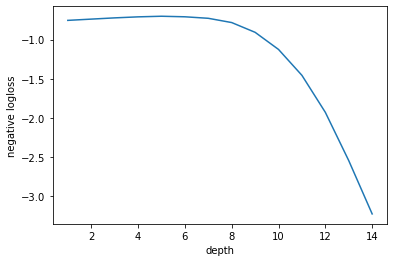

In [155]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [156]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 5


从这开始写， tune parameter 的话可以是换solver（logistics）, kernel and C(SVM)

In [157]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(scores.mean())

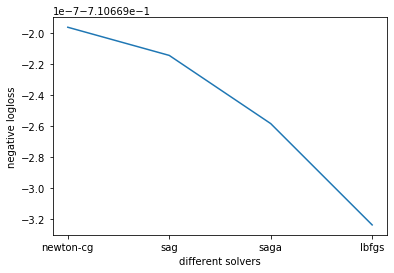

In [65]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('negative logloss')
plt.show()

From the graph we can know the best solver is newton-cg

In [66]:
bestScore = max(cv_scores_log)
bestScore

-0.7106691961805094

In [67]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
c_values = [0.1,0.5,1]
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            StandardScaler(),
            PCA(2),
            SVC(kernel = name, C = 1, max_iter = 10, gamma = n, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(scores.mean())
    cv_scores_svm.append(score_list)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

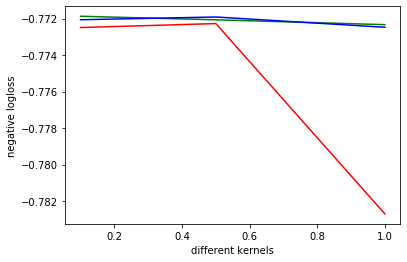

In [68]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different kernels')
plt.ylabel('negative logloss')
plt.show()

#### 2.More features

In [15]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

In [16]:
date = np.vectorize(date_to_month)

In [17]:
t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

In [18]:
t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

In [19]:
featureSelect = featureSelect + ['year','month','day','hour','minute']

In [20]:
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

In [21]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

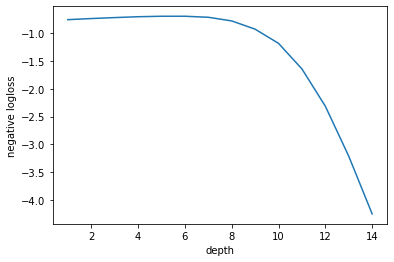

In [76]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [77]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 6


In [78]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [79]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [80]:
treeModel.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
treeModel.score(X,y)

0.7100227888377693

In [82]:
predLable = treeModel.predict_proba(X_pred)

In [83]:
outputCSV(predLable)

从这开始，把之前的model再跑一把就行

logloss:0.70834(depth = 5) 0.71338(depth = 4) 0.71477 (depth = 6) 0.73024 (depth = 7) 1.33995(depth = 10)

In [84]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(scores.mean())

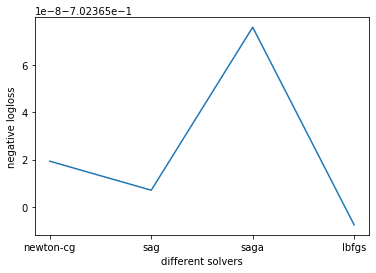

In [85]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('negative logloss')
plt.show()

In [86]:
bestScore = max(cv_scores_log)
bestScore

-0.7023649242190876

In [165]:
logReg1 = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',solver='saga')
)
logReg1.fit(X,y)
predLable = logReg1.predict_proba(X_pred)
outputCSV(predLable)

result: 0.72468

In [88]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
c_values = [0.1,1,10]
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            StandardScaler(),
            PCA(2),
            SVC(kernel = name, C = 1, max_iter = 10, gamma = n, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(scores.mean())
    cv_scores_svm.append(score_list)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

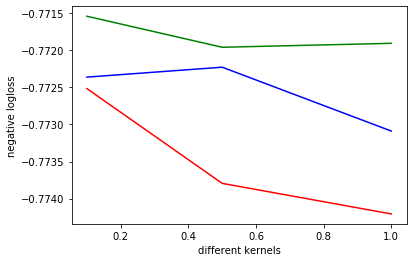

In [89]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different gamma')
plt.ylabel('negative logloss')
plt.show()

#### 3.Add categorical features

In [22]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list])

In [23]:
list2str = np.vectorize(list2str)

In [24]:
t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

In [25]:
tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

In [170]:
k_range = range(1,9)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

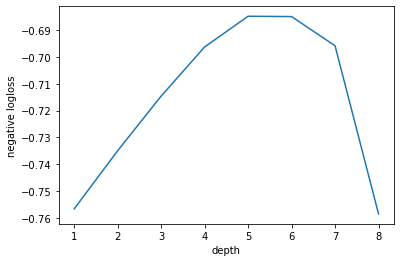

In [95]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [96]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,9):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 5


In [97]:
treeModel = DecisionTreeClassifier(max_depth = 6)

In [98]:
treeModel.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
treeModel.score(X,y)

0.7155695059551963

In [100]:
predLable = treeModel.predict_proba(X_pred)

In [101]:
outputCSV(predLable)

从这开始，把之前的model再跑一把就行

logloss: 0.69182(d = 5) 0.68476(d=6)

In [113]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        MaxAbsScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


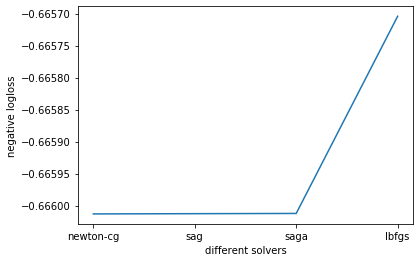

In [114]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('negative logloss')
plt.show()

In [105]:
bestScore = max(cv_scores_log)
bestScore

-0.6765240419404132

In [118]:
logReg1 = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',max_iter=1000,solver='lbfgs')
)
logReg1.fit(X,y)

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

There is ConvergenceWarning only on lbfgs solver. So I increased the number of iterations 

In [120]:
predLable = logReg1.predict_proba(X_pred)
outputCSV(predLable)

In [126]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
c_values = [0.1,0.5,1]
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            MaxAbsScaler(),
            TruncatedSVD(),
            SVC(kernel = name, C = 1, gamma = n, max_iter = 10, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(scores.mean())
    cv_scores_svm.append(score_list)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:

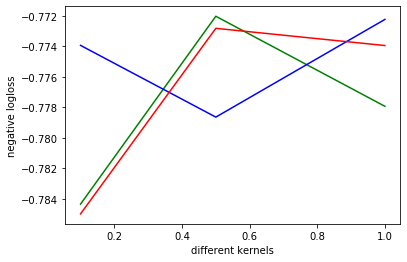

In [127]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different kernels')
plt.ylabel('negative logloss')
plt.show()

In [27]:
svm1 = make_pipeline(
    MaxAbsScaler(),
    TruncatedSVD(),
    SVC(kernel = 'rbf', C = 1, gamma = 1, max_iter = 10, probability = True)
)
svm1.fit(X,y)
predLable = svm1.predict_proba(X_pred)
outputCSV(predLable)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


result: 0.79085